<a href="https://colab.research.google.com/github/tripti882/my-frist-project-tripti-jha/blob/main/braintumordectitionAi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown --id 1ZJsmRwk9vr7iFgRz5DuvMn97GytKajA6 -O archive.zip


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ZJsmRwk9vr7iFgRz5DuvMn97GytKajA6
To: /content/archive.zip
100% 7.92M/7.92M [00:00<00:00, 67.3MB/s]


In [2]:
!unzip archive.zip

Archive:  archive.zip
  inflating: brain_tumor_dataset/Tumor/Y1.jpg  
  inflating: brain_tumor_dataset/Tumor/Y10.jpg  
  inflating: brain_tumor_dataset/Tumor/Y100.JPG  
  inflating: brain_tumor_dataset/Tumor/Y101.jpg  
  inflating: brain_tumor_dataset/Tumor/Y102.jpg  
  inflating: brain_tumor_dataset/Tumor/Y103.jpg  
  inflating: brain_tumor_dataset/Tumor/Y104.jpg  
  inflating: brain_tumor_dataset/Tumor/Y105.jpg  
  inflating: brain_tumor_dataset/Tumor/Y106.jpg  
  inflating: brain_tumor_dataset/Tumor/Y107.jpg  
  inflating: brain_tumor_dataset/Tumor/Y108.jpg  
  inflating: brain_tumor_dataset/Tumor/Y109.JPG  
  inflating: brain_tumor_dataset/Tumor/Y11.jpg  
  inflating: brain_tumor_dataset/Tumor/Y111.JPG  
  inflating: brain_tumor_dataset/Tumor/Y112.JPG  
  inflating: brain_tumor_dataset/Tumor/Y113.JPG  
  inflating: brain_tumor_dataset/Tumor/Y114.JPG  
  inflating: brain_tumor_dataset/Tumor/Y115.JPG  
  inflating: brain_tumor_dataset/Tumor/Y116.JPG  
  inflating: brain_tumor_dataset

In [3]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import shutil
import glob

In [4]:
# count thhe number of images  in respectinve files  tumor=1 healthy =0
ROOT_DIR = 'brain_tumor_dataset'
number_of_images ={ }

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))


  number_of_images.items()

In [5]:


# Change ROOT_DIR to the correct directory path.
# This should be the directory containing the 'brain_tumor_dataset'
# Assuming 'brain_tumor_dataset' is in the current directory:
ROOT_DIR = "./brain_tumor_dataset"

number_of_images = {dir: len(os.listdir(os.path.join(ROOT_DIR, dir))) for dir in os.listdir(ROOT_DIR)}



In [6]:
import os
import math
import shutil
import numpy as np

def data_split(p, split, ROOT_DIR):
    if not os.path.exists("./" + p):
        os.mkdir("./" + p)  # Create the main folder

        for dir in os.listdir(ROOT_DIR):
            # Create subdirectories inside the main folder
            os.makedirs(os.path.join("./" + p, dir), exist_ok=True)

            # Get the current number of images in the directory
            current_num_images = len(os.listdir(os.path.join(ROOT_DIR, dir)))
            # Calculate the number of images to select based on the current number
            selected_size = max(1, math.floor(split * current_num_images))  # Ensure at least 1 file

            # Randomly select images
            selected_images = np.random.choice(
                a=os.listdir(os.path.join(ROOT_DIR, dir)),
                size=selected_size,
                replace=False
            )

            for img in selected_images:
                O = os.path.join(ROOT_DIR, dir, img)  # Original path
                D = os.path.join("./" + p, dir, img)  # Destination path

                # Copy the image to the new folder
                shutil.copy(O, D)

                # Remove the original image after copying
                os.remove(O)

        print(f"Files successfully copied to the '{p}' folder.")
    else:
        print(f"{p} folder already exists.")

In [7]:
data_split("train", 0.7, ROOT_DIR)


Files successfully copied to the 'train' folder.


In [8]:
data_split("val", 0.5, ROOT_DIR)
data_split("test", 0.5, ROOT_DIR)


Files successfully copied to the 'val' folder.
Files successfully copied to the 'test' folder.


In [9]:
for dir in os.listdir(ROOT_DIR):
  # Use the string "test" as the key instead of the undefined variable 'test'
  number_of_images["test"] = len(os.listdir(os.path.join(ROOT_DIR, dir)))


  number_of_images.items()
  # Assuming you want to print the number of images in the "test" directory:
  print(number_of_images["test"])

12
8


In [10]:
from tensorflow.keras.models import Sequential # Import Sequential from tensorflow.keras.models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# ... (rest of your code) ...

model = Sequential()
model.add(Conv2D(filters= 16 , kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3),padding ="same"))
model.add(Conv2D(filters= 16 , kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters= 64 , kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(filters= 128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(rate=0.25)) # Use Dropout instead of dropout

model.add(Flatten()) # Use Flatten instead of flatten
model.add(Dense(units= 64, activation='relu'))
model.add(Dropout(rate=0.25)) # Use Dropout instead of dropout
model.add(Dense(units= 1, activation='sigmoid'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 222, 222, 16)        │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 109, 109, 64)        │           9,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       5,537,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,623,825 (21.45 MB)

 Trainable params: 5,623,825 (21.45 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow as tf

def pre_processingImage(path):
    """
    input: path (directory of images)
    output: preprocessed image dataset
    """
    # Load the dataset from the directory
    image_data = image_dataset_from_directory(
        directory=path,
        batch_size=32,
        image_size=(224, 224)  # Resize images to (224, 224)
    )

    # Apply additional preprocessing using .map function
    def preprocess(image, label):
        image = tf.image.convert_image_dtype(image, dtype=tf.float32)  # Convert to float32
        image = image / 255.0  # Normalize to [0, 1]
        return image, label

    # Map the preprocess function to the dataset
    image_data = image_data.map(preprocess)

    return image_data


In [12]:
path = "/content/train"
train_data = pre_processingImage(path)


Found 176 files belonging to 2 classes.


In [13]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow as tf

def pre_processingImage2(path):
    """
    input: path (directory of images)
    output: preprocessed image dataset
    """
    # Load the dataset from the directory
    image_data = image_dataset_from_directory(
        directory=path,  # Corrected typo here
        image_size=(224, 224)  # Resize images to (224, 224)
    )

    # Apply additional preprocessing using .map function
    def preprocess(image, label):
        image = tf.image.convert_image_dtype(image, dtype=tf.float32)  # Convert to float32
        image = image / 255.0  # Normalize to [0, 1]
        return image, label

    # Map the preprocess function to the dataset
    image_data = image_data.map(preprocess)

    return image_data


In [14]:
path = "/content/test"
test_data = pre_processingImage2(path)


Found 19 files belonging to 2 classes.


In [15]:
path = "/content/val"
val_data = pre_processingImage2(path)


Found 38 files belonging to 2 classes.


In [16]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Early stopping to prevent overfitting and unnecessary training
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=3, verbose=1, mode='max')

# Model checkpoint to save the best model based on validation accuracy
mc = ModelCheckpoint(filepath="./best_model.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# List of callbacks
Cd = [es, mc]


In [17]:
# Assuming 'model' is your Keras model object
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Now you can proceed with model.fit(...)
hs = model.fit(
    train_data,
    steps_per_epoch=8,
    epochs=30,
    verbose=1,
    validation_data=val_data,
    validation_steps=16,
    callbacks=Cd
)

Epoch 1/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.5989 - loss: 0.0000e+00  
Epoch 1: val_accuracy improved from -inf to 0.60526, saving model to ./best_model.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.6054 - loss: 0.0000e+00 - val_accuracy: 0.6053 - val_loss: 0.0000e+00
Epoch 2/30
5/8 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.6284 - loss: 0.0000e+00
Epoch 2: val_accuracy did not improve from 0.60526
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.6229 - loss: 0.0000e+00 - val_accuracy: 0.6053 - val_loss: 0.0000e+00
Epoch 3/30
5/8 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.6012 - loss: 0.0000e+00
Epoch 3: val_accuracy did not improve from 0.60526
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.6059 - loss: 0.0000e+00 - val_accuracy: 0.6053 - val_loss: 0.0000e+00
Epoch 4/30
5/8 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6140 - loss: 0.0000e+00
Epoch 4: val_accuracy did not improve from 0.60526
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accur

In [18]:
h = hs.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

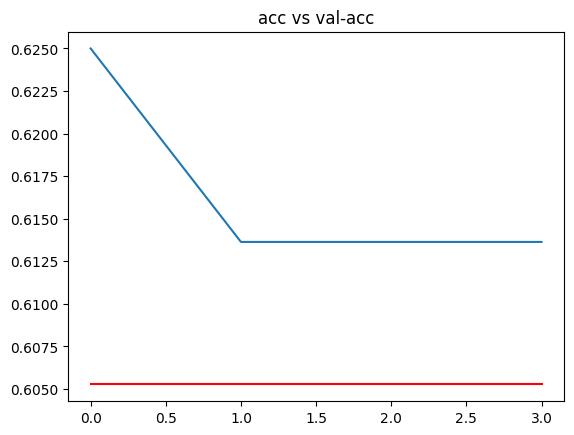

In [19]:
import matplotlib.pyplot as plt

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c="red")
plt.title("acc vs val-acc")
plt.show()

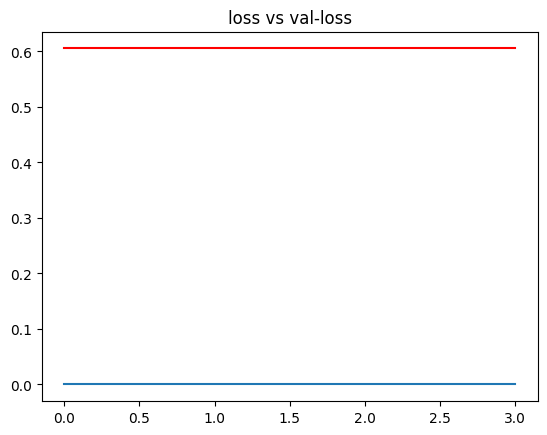

In [20]:
import matplotlib.pyplot as plt

plt.plot(h['loss'])
plt.plot(h['val_accuracy'], c="red")
plt.title("loss vs val-loss")
plt.show()

In [21]:
# prompt: #model accuray

# Load the best saved model
from tensorflow.keras.models import load_model
model = load_model("./best_model.keras")

# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_data)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6316 - loss: 0.0000e+00
Test Loss: 0.0
Test Accuracy: 0.6315789222717285


In [22]:
from keras.preprocessing.image   import load_img, img_to_array

Files in /content/brain_tumor_dataset/Tumor/: ['Y186.jpg', 'Y255.JPG', 'Y120.JPG', 'Y11.jpg', 'Y258.JPG', 'Y31.jpg', 'Y55.jpg', 'Y18.JPG', 'Y170.JPG', 'Y79.jpg', 'Y101.jpg', 'Y251.JPG']
Using image: /content/brain_tumor_dataset/Tumor/Y186.jpg


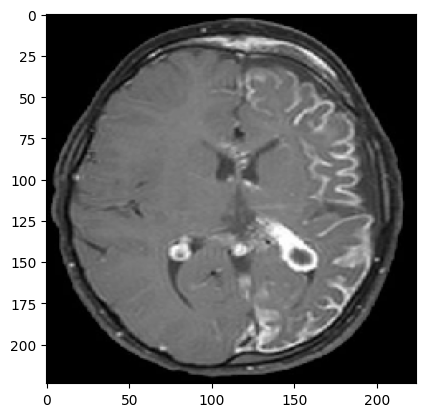

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step
 Tumor


In [24]:
import numpy as np # Import numpy for argmax
import matplotlib.pyplot as plt
from keras.preprocessing.image   import load_img, img_to_array

# Verify if the dataset directory exists
import os
dataset_dir = "/content/brain_tumor_dataset/Tumor/"  # Check for Tumor directory
if not os.path.exists(dataset_dir):
  print(f"Error: Dataset directory not found: {dataset_dir}")
  # You might need to download or mount the dataset
  # For example, if you're using Google Colab, you can mount your Google Drive:
  # from google.colab import drive
  # drive.mount('/content/drive')
  # and then update the dataset_dir accordingly.
else:
  # List the files in the Tumor directory to check if an image is present
  print(f"Files in {dataset_dir}: {os.listdir(dataset_dir)}")
  # Choose an existing image from the listed files for prediction
  image_filename = os.listdir(dataset_dir)[0]  # Selecting the first image as an example
  path = os.path.join(dataset_dir, image_filename)  # Creating the correct path
  print(f"Using image: {path}")

# Update the path to a valid image within the dataset directory
# path ="/content/brain_tumor_dataset/healthy/11 no.jpg"  # Commented out the problematic path

# Rest of your code remains the same
img = load_img(path, target_size=(224, 224))
input_arr = img_to_array(img)/255

plt.imshow(input_arr)
plt.show()
input_arr.shape

input_arr = np.expand_dims(input_arr, axis=0)
input_arr.shape

# Use predict and argmax instead of predict_classes
pred_probs = model.predict(input_arr)  # Get prediction probabilities
pred = np.argmax(pred_probs, axis=-1)[0] # Get the class with highest probability
pred

if pred == 1:
  print("no  Tumor")
else:
  print(" Tumor")

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# Sample Dataset (Replace with your own dataset)
# Generating dummy binary classification data
X = np.random.rand(1000, 20)  # 1000 samples, 20 features
y = np.random.randint(2, size=(1000, 1))  # Binary labels (0 or 1)

# Preprocessing: Scale the input data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model Architecture
model = Sequential()

# Input layer with 20 features, and a hidden layer with 64 units
model.add(Dense(64, input_dim=20, activation='relu'))

# Adding a dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Hidden layer with 32 units
model.add(Dense(32, activation='relu'))

# Output layer for binary classification (Sigmoid for binary output)
model.add(Dense(1, activation='sigmoid'))

# Compile the model with Binary Crossentropy loss for binary classification
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Training the model with validation data
history1 = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=30,
                    batch_size=32,
                    callbacks=[early_stopping],
                    verbose=2)

# Evaluate the model performance on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')


In [ ]:
h = history1.history  # Assign the 'history' attribute to 'h'
h.keys()


import matplotlib.pyplot as plt

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c="red")
plt.title("acc vs val-acc")
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h['loss'])
plt.plot(h['val_accuracy'], c="red")
plt.title("loss vs val-loss")
plt.show()

In [ ]:
# prompt: #model accuray

# Load the best saved model
from tensorflow.keras.models import load_model
model = load_model("./best_model.keras")

# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_data)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Files in /content/brain_tumor_dataset/Tumor/: ['Y186.jpg', 'Y255.JPG', 'Y120.JPG', 'Y11.jpg', 'Y258.JPG', 'Y31.jpg', 'Y55.jpg', 'Y18.JPG', 'Y170.JPG', 'Y79.jpg', 'Y101.jpg', 'Y251.JPG']


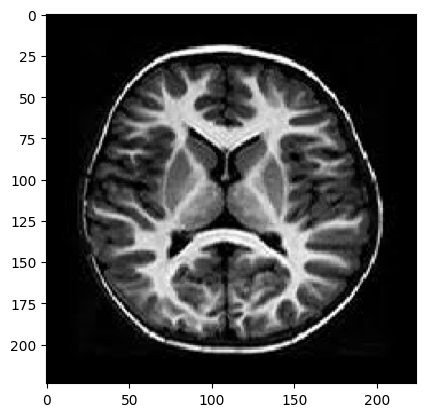

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
no Tumor


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model  # Import for loading the model
import os

# Verify if the dataset directory exists
dataset_dir = "/content/brain_tumor_dataset/Tumor/"
if not os.path.exists(dataset_dir):
    print(f"Error: Dataset directory not found: {dataset_dir}")
else:
    # List the files in the directory to check if the image exists
    print(f"Files in {dataset_dir}: {os.listdir(dataset_dir)}")

# Update the path if necessary based on the above verification
path = "/content/test/healthy/14 no.jpg"

# Load the model (replace with your actual model path)
model = load_model('/content/best_model.keras')

# Load and preprocess the image
img = load_img(path, target_size=(224, 224))  # Adjust target_size based on your model's input size
input_arr = img_to_array(img) / 255.0  # Normalize the image

# Display the image
plt.imshow(input_arr)
plt.show()

# Expand dimensions to fit the model input
input_arr = np.expand_dims(input_arr, axis=0)

# Get prediction probabilities
pred_probs = model.predict(input_arr)

# Get the predicted class with the highest probability
pred = np.argmax(pred_probs, axis=-1)[0]

# Output the prediction
if pred == 1:
    print("Tumor")
else:
    print("no Tumor")


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Early stopping to prevent overfitting and unnecessary training
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=3, verbose=1, mode='max')

# Model checkpoint to save the best model based on validation accuracy
mc = ModelCheckpoint(filepath="./best_model.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# List of callbacks
Cd = [es, mc]
